___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project - Solutions

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data
how to use pandas to directly read data from Google finance using pandas!

In [3]:
from pandasdatareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns

ModuleNotFoundError: No module named 'pandasdatareader'

## Data

To get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. datetime to set start and end datetime objects.
2. the ticker symbol for each bank.
2. use of datareader to grab info on the stock.

    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)



In [8]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [16]:
import yfinance as yf# Define tickers and date range
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
start = "2022-01-01"
end = "2023-01-01"

# Download data for all tickers
data = yf.download(tickers, start=start, end=end, group_by='ticker')

# Access individual dataframes
BAC = data['BAC']
C = data['C']
GS = data['GS']
JPM = data['JPM']
MS = data['MS']
WFC = data['WFC']

print(BAC.head()) 

C:\Users\Kshitij Jaywant More\AppData\Local\Temp\ipykernel_5488\1179552494.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end, group_by='ticker')
[*********************100%***********************]  6 of 6 completed

Price            Open       High        Low      Close    Volume
Date                                                            
2022-01-03  41.169030  42.447290  41.068595  42.164246  58587900
2022-01-04  42.967724  44.218589  42.949463  43.816853  74606700
2022-01-05  43.953812  44.163811  43.059032  43.077293  57791600
2022-01-06  43.807722  43.972069  43.086418  43.944679  52040900
2022-01-07  43.962950  45.022078  43.880776  44.903381  59082600


In [20]:
# Could also do this for a Panel Object
import yfinance as yf

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
start = "2022-01-01"
end = "2023-01-01"

# Use yfinance to download all data at once
df = yf.download(tickers, start=start, end=end, group_by='ticker', auto_adjust=False)

[*********************100%***********************]  6 of 6 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [21]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [22]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [23]:
bank_stocks.head()

Bank Ticker        BAC                                                     C  \
Stock Info        Open       High        Low      Close    Volume       Open   
Date                                                                           
2022-01-03   41.169030  42.447290  41.068595  42.164246  58587900  53.401313   
2022-01-04   42.967724  44.218589  42.949463  43.816853  74606700  55.915138   
2022-01-05   43.953812  44.163811  43.059032  43.077293  57791600  55.950056   
2022-01-06   43.807722  43.972069  43.086418  43.944679  52040900  56.054790   
2022-01-07   43.962950  45.022078  43.880776  44.903381  59082600  56.892735   

Bank Ticker                                             ...         MS  \
Stock Info        High        Low      Close    Volume  ...       Open   
Date                                                    ...              
2022-01-03   55.522352  53.340213  55.077194  30508500  ...  87.834309   
2022-01-04   56.499956  55.461256  55.504898  30303600  ...  90.195332   
2022-01-05   56.220645  54.797886  54.858986  25149100  ...  91.698572   
2022-01-06   57.006199  55.435060  56.657063  33334200  ...  92.069957   
2022-01-07   58.088549  56.892735  57.416447  26548200  ...  91.530566   

Bank Ticker                                                   WFC             \
Stock Info        High        Low      Close    Volume       Open       High   
Date                                                                           
2022-01-03   89.664743  87.807782  88.594780   8481900  44.695789  46.413102   
2022-01-04   92.565170  90.177649  92.193779   8967000  47.116475  48.550613   
2022-01-05   92.874649  89.815084  89.912354  10288800  48.340510  48.541473   
2022-01-06   92.149538  88.975020  91.450966  10059200  48.550612  49.025611   
2022-01-07   92.432517  91.017689  92.008072   6128400  49.199163  50.414068   

Bank Ticker                                  
Stock Info         Low      Close    Volume  
Date                                         
2022-01-03   44.686652  46.340023  38978100  
2022-01-04   47.061666  48.185226  43855100  
2022-01-05   47.500125  47.765030  35072600  
2022-01-06   48.103014  48.989075  29720800  
2022-01-07   49.144354  50.030415  35149300  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [24]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     45.085972
C       59.680923
GS     372.000519
JPM    154.040771
MS      96.816460
WFC     54.191410
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [25]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [26]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,0.039195,0.007766,0.030734,0.037910,0.040623,0.039819
2022-01-05,-0.016878,-0.011637,-0.021719,-0.018282,-0.024746,-0.008720
2022-01-06,0.020136,0.032776,-0.004265,0.010624,0.017112,0.025626
2022-01-07,0.021816,0.013403,0.001461,0.009908,0.006092,0.021257


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

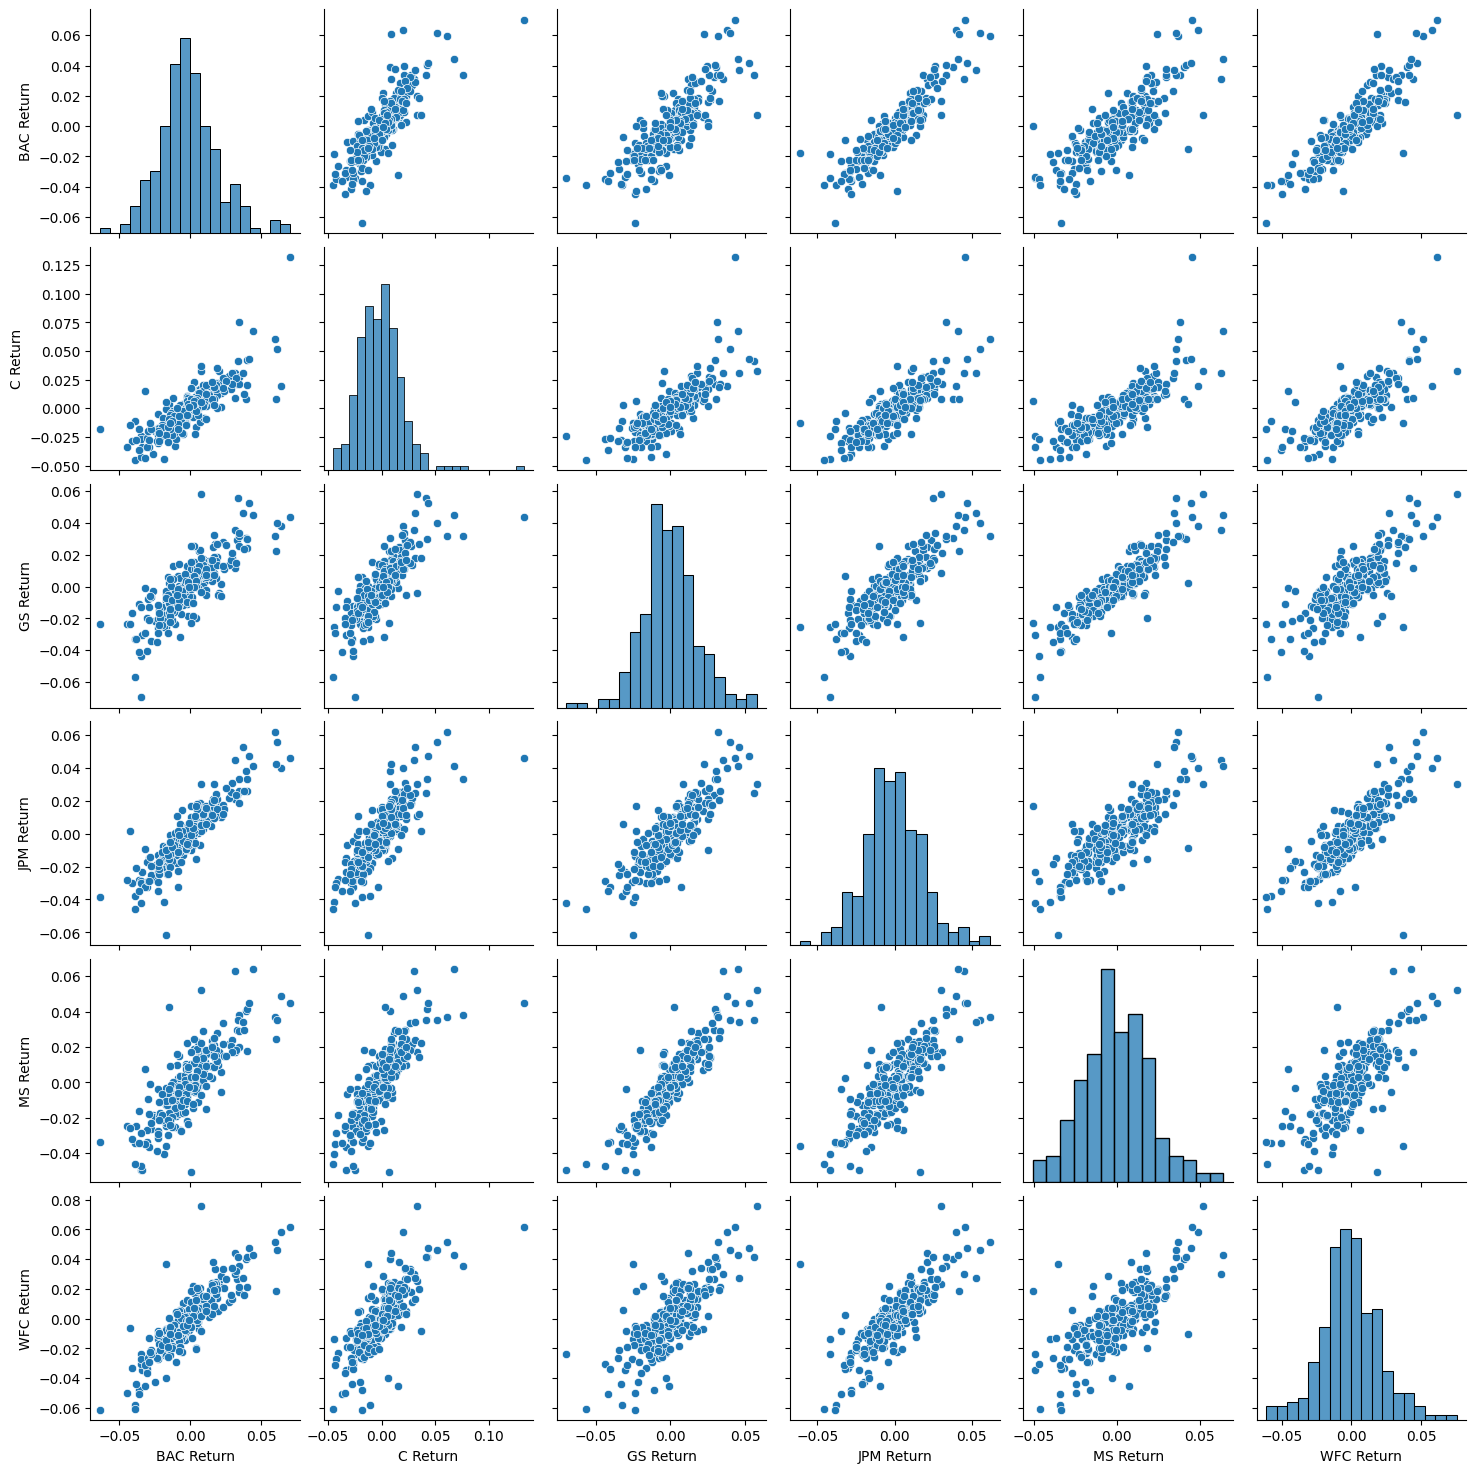

In [27]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [30]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2022-03-07
C Return     2022-06-10
GS Return    2022-01-18
JPM Return   2022-01-14
MS Return    2022-10-14
WFC Return   2022-03-07
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [33]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2022-07-15
C Return     2022-07-15
GS Return    2022-06-24
JPM Return   2022-05-23
MS Return    2022-11-10
WFC Return   2022-06-24
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [34]:
returns.std() # Citigroup riskiest

BAC Return    0.020350
C Return      0.020950
GS Return     0.018556
JPM Return    0.018806
MS Return     0.020324
WFC Return    0.021160
dtype: float64

In [43]:
risk_2022 = returns.loc['2022-01-01':'2022-12-31'].std()
risk_2022.index = [ticker + " Return" for ticker in risk_2022.index]
print(risk_2022)

BAC Return Return    0.020350
C Return Return      0.020950
GS Return Return     0.018556
JPM Return Return    0.018806
MS Return Return     0.020324
WFC Return Return    0.021160
dtype: float64


In [59]:
returns.loc['2022-01-01':'2022-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.020350
C Return      0.020950
GS Return     0.018556
JPM Return    0.018806
MS Return     0.020324
WFC Return    0.021160
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

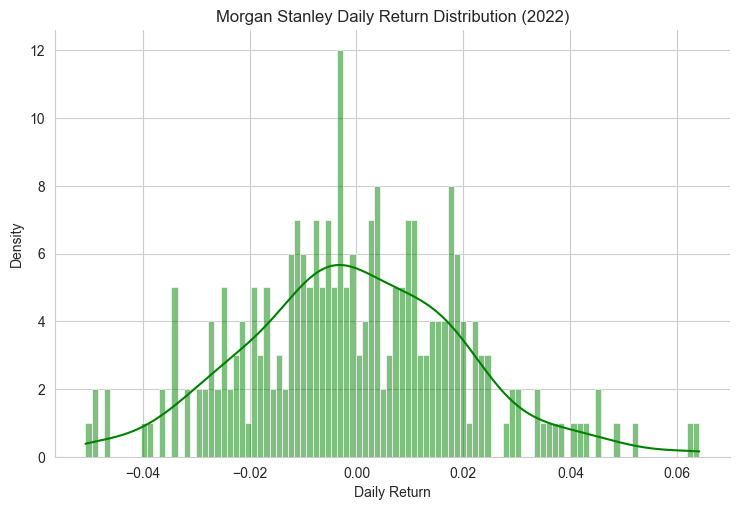

In [69]:

import matplotlib.pyplot as plt

sns.displot(
    data=returns,
    x='MS Return',
    bins=100,
    kde=True,
    color='green',
    height=5,        # controls the plot height in inches
    aspect=1.5       # width = height * aspect
)

plt.title("Morgan Stanley Daily Return Distribution (2022)")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()


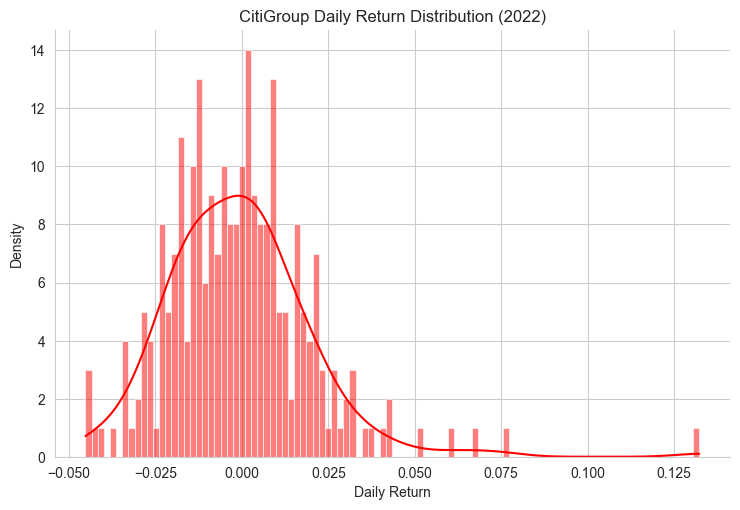

In [71]:
sns.displot(
    returns.loc['2022-01-01':'2022-12-31']['C Return'].dropna(),
    bins=100,
    kde=True,
    color='red',
    height=5,
    aspect=1.5
)

plt.title("CitiGroup Daily Return Distribution (2022)")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

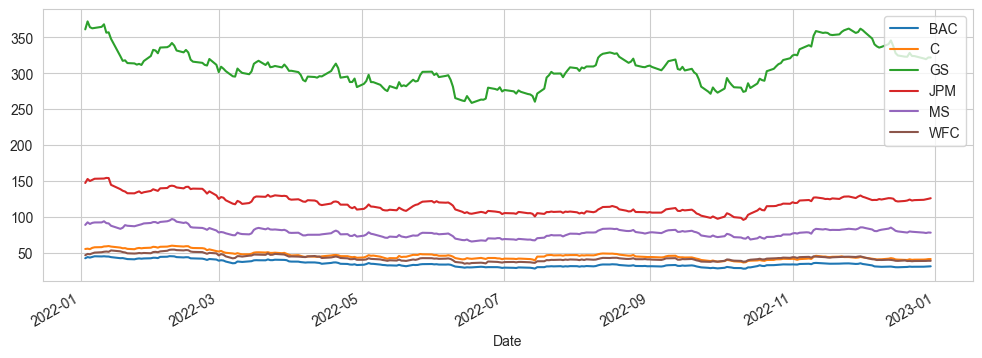

In [74]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: xlabel='Date'>

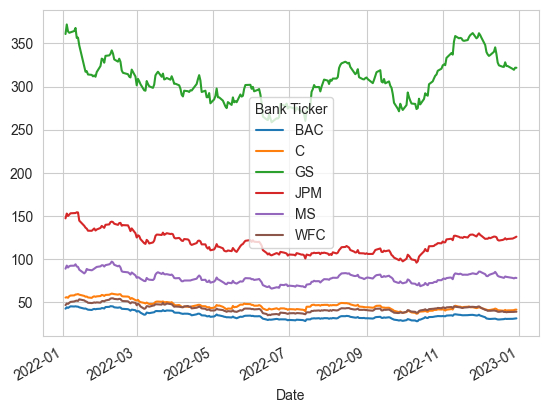

In [75]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2022. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2022**

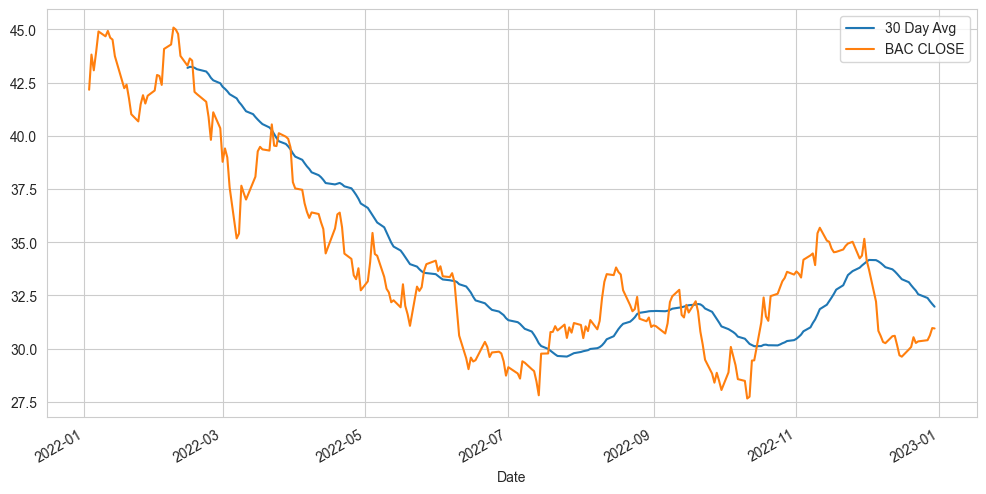

In [94]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2022-01-01':'2023-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2022-01-01':'2023-01-01'].plot(label='BAC CLOSE')
plt.legend()

 a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

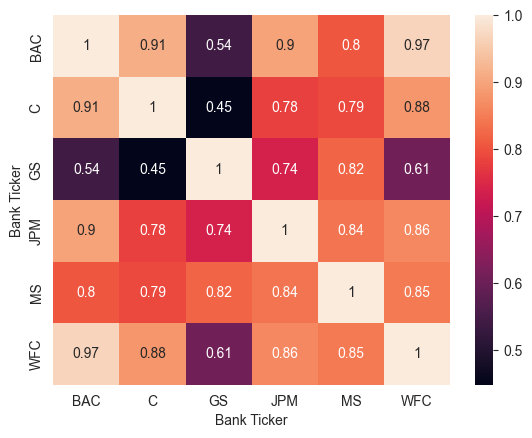

In [95]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.